# Promote Robustness with Noise

Training a neural network with a small dataset can cause the network to memorize all training examples, leading to poor performance on a holdout dataset. Given the patchy or sparse sampling of points in the high-dimensional input space, small datasets may also represent a harder mapping problem for neural networks to learn. One approach to making the input space smoother and easier to learn is to add noise to inputs during training. In this tutorial, you will discover that adding noise to a neural network during training can improve the robustness of the network, resulting in better generalization and faster learning. After reading this tutorial, you will know:

* Small datasets can make learning challenging for neural nets, and the examples can be memorized.
* Adding noise during training can make the training process more robust and reduce generalization error.
* Noise is traditionally added to the inputs but can also be added to weights, gradients, and even activation functions.

## Noise Regularization

In this section, you will discover the brittleness of large network weights and how the addition of statistical noise can provide a regularizing effect, as well as tips to help when adding noise to your neural network models.

### Challenge of Small Training Datasets

Small datasets can introduce problems when training large neural networks. The first problem is that the network may effectively memorize the training dataset. Instead of learning a general mapping from inputs to outputs, the model may learn the specific input examples and their associated outputs. This will result in a model that performs well on the training dataset and poor on new data, such as a holdout dataset. The second problem is that a small dataset provides less opportunity to describe the structure of the input space and its relationship to the output. More training data provides a richer description of the problem from which the model may learn. Fewer data points mean that rather than a smooth input space, the points may represent a jarring and disjointed structure that may result in a difficult, if not unlearnable, the mapping function. It is not always possible to acquire more data. Further, getting a hold of more data may not address these problems.

### Add Random Noise During Training

One approach to improving generalization error and improving the mapping problem's structure is to add random noise.

At first, this sounds like a recipe for making learning more challenging. It is a counter-intuitive suggestion to improving performance because one would expect noise to degrade the model's performance during training.

The addition of noise during the training of a neural network model has a regularization effect and, in turn, improves the robustness of the model. It has been shown to have a similar impact on the loss function as the addition of a penalty term, as in the case of weight regularization
methods.

Each time a training sample is exposed to the model, random noise is added to the input variables making them different every time it is exposed. In this way, adding noise to input samples is a simple form of data augmentation. In effect, adding noise expands the size of the training dataset.

Adding noise means that the network cannot memorize training samples because they are changing all of the time, resulting in smaller network weights and a more robust network with lower generalization error. The noise means that it is as though new samples are being drawn from the domain in the vicinity of known samples, smoothing the structure of the input space. This smoothing may mean that the mapping function is easier for the network to learn, resulting in better and faster learning.

### How and Where to Add noise

The most common type of noise used during training is the addition of Gaussian noise to input variables. Gaussian noise, or white noise, has a mean of zero and a standard deviation of one and can be generated as needed using a pseudorandom number generator. The addition of Gaussian noise to the inputs to a neural network was traditionally referred to as jitter or random jitter after using the term in signal processing to refer to the uncorrelated random noise in electrical circuits. The amount of noise added (e.g., the spread or standard deviation) is a configurable hyperparameter. Too little noise has no effect, whereas too much noise makes the mapping function challenging to learn.

The standard deviation of the random noise controls the amount of spread and can be adjusted based on the scale of each input variable. It can be easier to configure if the scale of the input variables has first been normalized. Noise is only added during training. No noise is added during the evaluation of the model or when the model is used to make predictions on new data. The addition of noise is also an important part of automatic feature learning, such as in autoencoders, so-called denoising autoencoders that explicitly require models to learn robust features in the presence of noise added to inputs.

Although additional noise to the inputs is the most common and widely studied approach, random noise can be added to other network parts during training. Some examples include:

* Add noise to activations, i.e., the outputs of each layer.
* Add noise to weights, i.e., an alternative to the inputs.
* Add noise to the gradients, i.e., the direction to update weights.
* Add noise to the outputs, i.e., the labels or target variables.

The addition of noise to the layer activations allows noise to be used at any point in the network. This can be beneficial for very deep networks. Noise can be added to the layer outputs themselves, but this is more likely achieved via a noisy activation function. The addition of noise to weights allows the approach to be used throughout the network in a consistent way instead of adding noise to inputs and layer activations. This is particularly useful in recurrent neural networks.

The addition of noise to gradients focuses more on improving the robustness of the optimization process itself rather than the structure of the input domain. The noise can start high at the beginning of training and decrease over time, much like a decaying learning rate.
This approach has proven to be an effective method for very deep networks and various network types.

Adding noise to the activations, weights, or gradients provides a more generic approach to adding noise that is invariant to the input variables provided to the model. If the problem domain is believed or expected to have mislabeled examples, then adding noise to the class label can improve the model's robustness to this type of error. Although, it can be easy to derail the learning process. Adding noise to a continuous target variable in the case of regression or time series forecasting is much like the addition of noise to the input variables and
maybe a better use case.

### Tips for Adding Noise During Training

This section provides some tips for adding noise during training with your neural network.

**Problem Types for Adding Noise**

Noise can be added to training regardless of the type of problem that is being addressed. It is appropriate to try adding noise to both classification and regression type problems. The type of noise can be specialized to the types of data used as input to the model, for example, two-dimensional noise in images and signal noise in audio data.

**Add Noise to Different Network Types**

Adding noise during training is a generic method that can be used regardless of the neural network used. It was a method used primarily with Multilayer Perceptrons given their prior dominance, but it can be used with Convolutional and Recurrent Neural Networks.

**Rescale Data First**

It is important that the addition of noise has a consistent effect on the model. This requires that the input data is rescaled so that all variables have the same scale so that when noise is added to the inputs with a fixed variance, it has the same effect. It also applies to adding noise to weights and gradients as they are affected by the scale of the inputs. This can be achieved via standardization or normalization of input variables. If random noise is added after data scaling, the variables may need to be rescaled, perhaps per minibatch.

**Test the Amount of Noise**
You cannot know how much noise will benefit your specific model on your training dataset. Experiment with different amounts, and even different types of noise, to discover what works best. Be systematic and use controlled experiments, perhaps on smaller datasets across a range of values.

**Noisy Training Only**

Noise is only added during the training of your model. Be sure that any source of noise is not added during the evaluation of your model or when your model is used to make predictions on new data.

## Noise Regularization Case Study

In this section, we will demonstrate how to use noise regularization to reduce the overfitting of an MLP on a simple binary classification problem. This example provides a template for applying noise regularization to your neural network for classification and regression problems.

### Binary Classification Problem

We will use a standard binary classification problem that defines two two-dimensional concentric circles of observations: one circle for each class. Each observation has two input variables with the same scale and a class output value of 0 or 1. This dataset is called the `circles` dataset because of the shape of the observations in each class when plotted. We can use the `make_circles()` function to generate observations from this problem. We will add noise to the data and seed the random number generator to generate the same samples each time the code is run.

```
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.2, random_state=1)
```

We can plot the dataset where the two variables are taken as `x` and `y` coordinates on a graph, and the class value is taken as the color of the observation. The complete example of generating the dataset and plotting it is listed below.

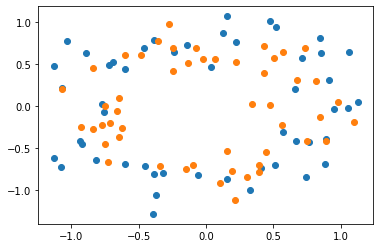

In [2]:
# scatter plot of moons dataset
from sklearn.datasets import make_circles
from matplotlib import pyplot
from numpy import where

# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.2, random_state=1)

# scatter plot for each class value
for class_value in range(2):
    # select indices of points with the class label
    row_ix = where(y == class_value)
    
    # scatter plot for points with a different color
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

# show plot
pyplot.show()

Running the example creates a scatter plot showing the concentric circles shape of the observations in each class. We can see the noise in the dispersal of the points, making the circles less obvious.

This is a good test problem because a line cannot separate the classes, e.g., are not linearly separable, requiring a nonlinear method such as a neural network to address. We have only generated 100 samples, which is small for a neural network, providing the opportunity to overfit the training dataset and have a higher error on the test dataset: a good case for using regularization. Further, the samples have noise, allowing the model to learn aspects of the samples that do not generalize.

### Overfit Multilayer Perceptron Model

We can develop an MLP model to address this binary classification problem. The model will have one hidden layer with more nodes that may be required to solve this problem, providing an opportunity to overfit. We will also train the model for longer than is required to ensure the model overfits. Before we define the model, we will split the dataset into train and test sets, using 30 examples to train the model and 70 to evaluate the fit model's performance.

In [3]:
# overfit mlp for the moons dataset
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.2, random_state=1)

# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

Next, we can define the model. The model uses 500 nodes in the hidden layer and the rectified linear activation function. A sigmoid activation function is used in the output layer to predict class values of 0 or 1. The model is optimized using the binary cross-entropy loss function, suitable for binary classification problems and the efficient Adam version of gradient descent.

In [4]:
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

The defined model is then fit on the training data for 4,000 epochs and the default batch size of 32. We will use the test set as the validation dataset to get an idea of the model performance on a holdout dataset during training.

In [5]:
# fit model
history = model.fit(trainX, trainy, epochs=4000, validation_data=(testX, testy), verbose=1)

Epoch 1/4000
1/1 [==============================] - 1s 844ms/step - loss: 0.6940 - accuracy: 0.4667 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoch 2/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.6901 - accuracy: 0.6333 - val_loss: 0.6964 - val_accuracy: 0.4571
Epoch 3/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.6863 - accuracy: 0.6000 - val_loss: 0.6983 - val_accuracy: 0.4286
Epoch 4/4000
1/1 [==============================] - 0s 26ms/step - loss: 0.6826 - accuracy: 0.6000 - val_loss: 0.7002 - val_accuracy: 0.4286
Epoch 5/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.6792 - accuracy: 0.6000 - val_loss: 0.7022 - val_accuracy: 0.4286
Epoch 6/4000
1/1 [==============================] - 0s 26ms/step - loss: 0.6759 - accuracy: 0.6000 - val_loss: 0.7043 - val_accuracy: 0.4286
Epoch 7/4000
1/1 [==============================] - 0s 26ms/step - loss: 0.6727 - accuracy: 0.6000 - val_loss: 0.7064 - val_accuracy: 0.4286
Epoch 8/4000

Epoch 59/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5914 - accuracy: 0.6667 - val_loss: 0.7937 - val_accuracy: 0.4571
Epoch 60/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5904 - accuracy: 0.6667 - val_loss: 0.7941 - val_accuracy: 0.4571
Epoch 61/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5895 - accuracy: 0.6333 - val_loss: 0.7944 - val_accuracy: 0.4571
Epoch 62/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5885 - accuracy: 0.6333 - val_loss: 0.7947 - val_accuracy: 0.4571
Epoch 63/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5875 - accuracy: 0.6333 - val_loss: 0.7951 - val_accuracy: 0.4571
Epoch 64/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5866 - accuracy: 0.6333 - val_loss: 0.7955 - val_accuracy: 0.4571
Epoch 65/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5856 - accuracy: 0.6333 - val_loss: 0.7959 - val_accuracy: 0.4571
Epoch 

1/1 [==============================] - 0s 22ms/step - loss: 0.5457 - accuracy: 0.7000 - val_loss: 0.8075 - val_accuracy: 0.4714
Epoch 117/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5451 - accuracy: 0.7000 - val_loss: 0.8075 - val_accuracy: 0.4714
Epoch 118/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5445 - accuracy: 0.7000 - val_loss: 0.8074 - val_accuracy: 0.4714
Epoch 119/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5439 - accuracy: 0.7000 - val_loss: 0.8074 - val_accuracy: 0.4714
Epoch 120/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5432 - accuracy: 0.7000 - val_loss: 0.8073 - val_accuracy: 0.4714
Epoch 121/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5426 - accuracy: 0.7000 - val_loss: 0.8071 - val_accuracy: 0.4857
Epoch 122/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5420 - accuracy: 0.7000 - val_loss: 0.8069 - val_accuracy: 0.4857
Epoch 123/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.5117 - accuracy: 0.7000 - val_loss: 0.7935 - val_accuracy: 0.5286
Epoch 174/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5112 - accuracy: 0.7000 - val_loss: 0.7932 - val_accuracy: 0.5286
Epoch 175/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5107 - accuracy: 0.7000 - val_loss: 0.7929 - val_accuracy: 0.5286
Epoch 176/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5101 - accuracy: 0.7000 - val_loss: 0.7927 - val_accuracy: 0.5286
Epoch 177/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5096 - accuracy: 0.7000 - val_loss: 0.7924 - val_accuracy: 0.5286
Epoch 178/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5091 - accuracy: 0.7000 - val_loss: 0.7922 - val_accuracy: 0.5286
Epoch 179/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5086 - accuracy: 0.7000 - val_loss: 0.7919 - val_accuracy: 0.5429
Epoch 180/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.4816 - accuracy: 0.7333 - val_loss: 0.7815 - val_accuracy: 0.5571
Epoch 231/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4811 - accuracy: 0.7333 - val_loss: 0.7812 - val_accuracy: 0.5571
Epoch 232/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4806 - accuracy: 0.7333 - val_loss: 0.7809 - val_accuracy: 0.5571
Epoch 233/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4800 - accuracy: 0.7333 - val_loss: 0.7806 - val_accuracy: 0.5571
Epoch 234/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4795 - accuracy: 0.7333 - val_loss: 0.7803 - val_accuracy: 0.5571
Epoch 235/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4790 - accuracy: 0.7333 - val_loss: 0.7800 - val_accuracy: 0.5571
Epoch 236/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4785 - accuracy: 0.7333 - val_loss: 0.7797 - val_accuracy: 0.5571
Epoch 237/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.4515 - accuracy: 0.7667 - val_loss: 0.7689 - val_accuracy: 0.5286
Epoch 288/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4510 - accuracy: 0.7667 - val_loss: 0.7688 - val_accuracy: 0.5286
Epoch 289/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4505 - accuracy: 0.7667 - val_loss: 0.7688 - val_accuracy: 0.5286
Epoch 290/4000
1/1 [==============================] - 0s 26ms/step - loss: 0.4501 - accuracy: 0.7667 - val_loss: 0.7689 - val_accuracy: 0.5286
Epoch 291/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4496 - accuracy: 0.7667 - val_loss: 0.7688 - val_accuracy: 0.5286
Epoch 292/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4491 - accuracy: 0.7667 - val_loss: 0.7688 - val_accuracy: 0.5286
Epoch 293/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4486 - accuracy: 0.7667 - val_loss: 0.7687 - val_accuracy: 0.5286
Epoch 294/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.4249 - accuracy: 0.8000 - val_loss: 0.7730 - val_accuracy: 0.5143
Epoch 345/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4245 - accuracy: 0.8000 - val_loss: 0.7734 - val_accuracy: 0.5143
Epoch 346/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4241 - accuracy: 0.8000 - val_loss: 0.7737 - val_accuracy: 0.5143
Epoch 347/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4236 - accuracy: 0.8000 - val_loss: 0.7739 - val_accuracy: 0.5143
Epoch 348/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4232 - accuracy: 0.8000 - val_loss: 0.7742 - val_accuracy: 0.5143
Epoch 349/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4227 - accuracy: 0.8000 - val_loss: 0.7744 - val_accuracy: 0.5286
Epoch 350/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4223 - accuracy: 0.8000 - val_loss: 0.7746 - val_accuracy: 0.5286
Epoch 351/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.4007 - accuracy: 0.8000 - val_loss: 0.7938 - val_accuracy: 0.5571
Epoch 402/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4003 - accuracy: 0.8000 - val_loss: 0.7942 - val_accuracy: 0.5571
Epoch 403/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3998 - accuracy: 0.8000 - val_loss: 0.7947 - val_accuracy: 0.5571
Epoch 404/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3994 - accuracy: 0.8000 - val_loss: 0.7952 - val_accuracy: 0.5571
Epoch 405/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3990 - accuracy: 0.8000 - val_loss: 0.7959 - val_accuracy: 0.5571
Epoch 406/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3986 - accuracy: 0.8000 - val_loss: 0.7966 - val_accuracy: 0.5571
Epoch 407/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3982 - accuracy: 0.8000 - val_loss: 0.7972 - val_accuracy: 0.5571
Epoch 408/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.3774 - accuracy: 0.8333 - val_loss: 0.8286 - val_accuracy: 0.5571
Epoch 459/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3770 - accuracy: 0.8333 - val_loss: 0.8295 - val_accuracy: 0.5571
Epoch 460/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3766 - accuracy: 0.8333 - val_loss: 0.8304 - val_accuracy: 0.5571
Epoch 461/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3762 - accuracy: 0.8333 - val_loss: 0.8313 - val_accuracy: 0.5571
Epoch 462/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3758 - accuracy: 0.8333 - val_loss: 0.8320 - val_accuracy: 0.5571
Epoch 463/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3754 - accuracy: 0.8333 - val_loss: 0.8327 - val_accuracy: 0.5571
Epoch 464/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3750 - accuracy: 0.8333 - val_loss: 0.8333 - val_accuracy: 0.5571
Epoch 465/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.3544 - accuracy: 0.8333 - val_loss: 0.8745 - val_accuracy: 0.5714
Epoch 516/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3540 - accuracy: 0.8333 - val_loss: 0.8754 - val_accuracy: 0.5714
Epoch 517/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3536 - accuracy: 0.8333 - val_loss: 0.8765 - val_accuracy: 0.5714
Epoch 518/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3532 - accuracy: 0.8333 - val_loss: 0.8776 - val_accuracy: 0.5714
Epoch 519/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3528 - accuracy: 0.8333 - val_loss: 0.8785 - val_accuracy: 0.5714
Epoch 520/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3524 - accuracy: 0.8333 - val_loss: 0.8793 - val_accuracy: 0.5714
Epoch 521/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3520 - accuracy: 0.8333 - val_loss: 0.8800 - val_accuracy: 0.5714
Epoch 522/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.3313 - accuracy: 0.8667 - val_loss: 0.9282 - val_accuracy: 0.5714
Epoch 573/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3309 - accuracy: 0.8667 - val_loss: 0.9292 - val_accuracy: 0.5714
Epoch 574/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3305 - accuracy: 0.8667 - val_loss: 0.9302 - val_accuracy: 0.5714
Epoch 575/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3301 - accuracy: 0.8667 - val_loss: 0.9313 - val_accuracy: 0.5714
Epoch 576/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3297 - accuracy: 0.8667 - val_loss: 0.9325 - val_accuracy: 0.5714
Epoch 577/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3293 - accuracy: 0.8667 - val_loss: 0.9336 - val_accuracy: 0.5714
Epoch 578/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3289 - accuracy: 0.8667 - val_loss: 0.9344 - val_accuracy: 0.5714
Epoch 579/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.3080 - accuracy: 0.8667 - val_loss: 0.9910 - val_accuracy: 0.5714
Epoch 630/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3076 - accuracy: 0.8667 - val_loss: 0.9920 - val_accuracy: 0.5714
Epoch 631/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3072 - accuracy: 0.8667 - val_loss: 0.9928 - val_accuracy: 0.5714
Epoch 632/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3068 - accuracy: 0.8667 - val_loss: 0.9937 - val_accuracy: 0.5714
Epoch 633/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3065 - accuracy: 0.8667 - val_loss: 0.9948 - val_accuracy: 0.5714
Epoch 634/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3060 - accuracy: 0.8667 - val_loss: 0.9961 - val_accuracy: 0.5714
Epoch 635/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3056 - accuracy: 0.8667 - val_loss: 0.9975 - val_accuracy: 0.5714
Epoch 636/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.2854 - accuracy: 0.9000 - val_loss: 1.0615 - val_accuracy: 0.5714
Epoch 687/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2850 - accuracy: 0.9000 - val_loss: 1.0629 - val_accuracy: 0.5714
Epoch 688/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2846 - accuracy: 0.9000 - val_loss: 1.0642 - val_accuracy: 0.5714
Epoch 689/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2843 - accuracy: 0.9000 - val_loss: 1.0653 - val_accuracy: 0.5714
Epoch 690/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2839 - accuracy: 0.9000 - val_loss: 1.0664 - val_accuracy: 0.5714
Epoch 691/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2835 - accuracy: 0.9000 - val_loss: 1.0675 - val_accuracy: 0.5714
Epoch 692/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2832 - accuracy: 0.9000 - val_loss: 1.0688 - val_accuracy: 0.5714
Epoch 693/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.2643 - accuracy: 0.9000 - val_loss: 1.1358 - val_accuracy: 0.5571
Epoch 744/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2640 - accuracy: 0.9000 - val_loss: 1.1370 - val_accuracy: 0.5571
Epoch 745/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2636 - accuracy: 0.9000 - val_loss: 1.1383 - val_accuracy: 0.5571
Epoch 746/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2633 - accuracy: 0.9000 - val_loss: 1.1396 - val_accuracy: 0.5571
Epoch 747/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2629 - accuracy: 0.9000 - val_loss: 1.1411 - val_accuracy: 0.5571
Epoch 748/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2625 - accuracy: 0.9000 - val_loss: 1.1429 - val_accuracy: 0.5571
Epoch 749/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2622 - accuracy: 0.9000 - val_loss: 1.1447 - val_accuracy: 0.5571
Epoch 750/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.2447 - accuracy: 0.9333 - val_loss: 1.2172 - val_accuracy: 0.5429
Epoch 801/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2443 - accuracy: 0.9333 - val_loss: 1.2185 - val_accuracy: 0.5429
Epoch 802/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2440 - accuracy: 0.9333 - val_loss: 1.2201 - val_accuracy: 0.5429
Epoch 803/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2437 - accuracy: 0.9333 - val_loss: 1.2220 - val_accuracy: 0.5429
Epoch 804/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2434 - accuracy: 0.9333 - val_loss: 1.2239 - val_accuracy: 0.5429
Epoch 805/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2430 - accuracy: 0.9333 - val_loss: 1.2254 - val_accuracy: 0.5429
Epoch 806/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2427 - accuracy: 0.9333 - val_loss: 1.2269 - val_accuracy: 0.5429
Epoch 807/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.2270 - accuracy: 0.9333 - val_loss: 1.3023 - val_accuracy: 0.5143
Epoch 858/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2267 - accuracy: 0.9333 - val_loss: 1.3035 - val_accuracy: 0.5143
Epoch 859/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2264 - accuracy: 0.9333 - val_loss: 1.3050 - val_accuracy: 0.5143
Epoch 860/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2261 - accuracy: 0.9333 - val_loss: 1.3069 - val_accuracy: 0.5143
Epoch 861/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2258 - accuracy: 0.9333 - val_loss: 1.3090 - val_accuracy: 0.5143
Epoch 862/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2255 - accuracy: 0.9333 - val_loss: 1.3108 - val_accuracy: 0.5143
Epoch 863/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2252 - accuracy: 0.9333 - val_loss: 1.3121 - val_accuracy: 0.5143
Epoch 864/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.2111 - accuracy: 0.9333 - val_loss: 1.3927 - val_accuracy: 0.5143
Epoch 915/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2108 - accuracy: 0.9333 - val_loss: 1.3943 - val_accuracy: 0.5143
Epoch 916/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2106 - accuracy: 0.9333 - val_loss: 1.3959 - val_accuracy: 0.5143
Epoch 917/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2103 - accuracy: 0.9333 - val_loss: 1.3975 - val_accuracy: 0.5143
Epoch 918/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2100 - accuracy: 0.9333 - val_loss: 1.3990 - val_accuracy: 0.5143
Epoch 919/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2097 - accuracy: 0.9333 - val_loss: 1.4007 - val_accuracy: 0.5143
Epoch 920/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2095 - accuracy: 0.9333 - val_loss: 1.4027 - val_accuracy: 0.5143
Epoch 921/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1968 - accuracy: 0.9333 - val_loss: 1.4823 - val_accuracy: 0.5143
Epoch 972/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1966 - accuracy: 0.9333 - val_loss: 1.4836 - val_accuracy: 0.5143
Epoch 973/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1964 - accuracy: 0.9333 - val_loss: 1.4854 - val_accuracy: 0.5143
Epoch 974/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1961 - accuracy: 0.9333 - val_loss: 1.4878 - val_accuracy: 0.5143
Epoch 975/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1959 - accuracy: 0.9333 - val_loss: 1.4900 - val_accuracy: 0.5143
Epoch 976/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1957 - accuracy: 0.9333 - val_loss: 1.4918 - val_accuracy: 0.5143
Epoch 977/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1954 - accuracy: 0.9333 - val_loss: 1.4930 - val_accuracy: 0.5143
Epoch 978/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1839 - accuracy: 0.9333 - val_loss: 1.5731 - val_accuracy: 0.5143
Epoch 1029/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1837 - accuracy: 0.9333 - val_loss: 1.5743 - val_accuracy: 0.5143
Epoch 1030/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1835 - accuracy: 0.9333 - val_loss: 1.5751 - val_accuracy: 0.5143
Epoch 1031/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1833 - accuracy: 0.9333 - val_loss: 1.5761 - val_accuracy: 0.5143
Epoch 1032/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1830 - accuracy: 0.9333 - val_loss: 1.5777 - val_accuracy: 0.5143
Epoch 1033/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1828 - accuracy: 0.9333 - val_loss: 1.5794 - val_accuracy: 0.5143
Epoch 1034/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1826 - accuracy: 0.9333 - val_loss: 1.5808 - val_accuracy: 0.5143
Epoch 10

1/1 [==============================] - 0s 22ms/step - loss: 0.1720 - accuracy: 0.9333 - val_loss: 1.6550 - val_accuracy: 0.5143
Epoch 1086/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1718 - accuracy: 0.9333 - val_loss: 1.6565 - val_accuracy: 0.5143
Epoch 1087/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1716 - accuracy: 0.9333 - val_loss: 1.6579 - val_accuracy: 0.5143
Epoch 1088/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1714 - accuracy: 0.9333 - val_loss: 1.6592 - val_accuracy: 0.5143
Epoch 1089/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1711 - accuracy: 0.9333 - val_loss: 1.6598 - val_accuracy: 0.5143
Epoch 1090/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1709 - accuracy: 0.9333 - val_loss: 1.6604 - val_accuracy: 0.5143
Epoch 1091/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1708 - accuracy: 0.9333 - val_loss: 1.6610 - val_accuracy: 0.5143
Epoch 10

1/1 [==============================] - 0s 22ms/step - loss: 0.1610 - accuracy: 0.9333 - val_loss: 1.7346 - val_accuracy: 0.5286
Epoch 1143/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1608 - accuracy: 0.9333 - val_loss: 1.7363 - val_accuracy: 0.5286
Epoch 1144/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1606 - accuracy: 0.9333 - val_loss: 1.7377 - val_accuracy: 0.5286
Epoch 1145/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1604 - accuracy: 0.9333 - val_loss: 1.7392 - val_accuracy: 0.5286
Epoch 1146/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1602 - accuracy: 0.9333 - val_loss: 1.7404 - val_accuracy: 0.5286
Epoch 1147/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1601 - accuracy: 0.9333 - val_loss: 1.7416 - val_accuracy: 0.5286
Epoch 1148/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1599 - accuracy: 0.9333 - val_loss: 1.7429 - val_accuracy: 0.5286
Epoch 11

1/1 [==============================] - 0s 22ms/step - loss: 0.1508 - accuracy: 0.9667 - val_loss: 1.8127 - val_accuracy: 0.5286
Epoch 1200/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1507 - accuracy: 0.9667 - val_loss: 1.8136 - val_accuracy: 0.5286
Epoch 1201/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1505 - accuracy: 0.9667 - val_loss: 1.8148 - val_accuracy: 0.5286
Epoch 1202/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1503 - accuracy: 0.9667 - val_loss: 1.8165 - val_accuracy: 0.5286
Epoch 1203/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1501 - accuracy: 0.9667 - val_loss: 1.8181 - val_accuracy: 0.5286
Epoch 1204/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1500 - accuracy: 0.9667 - val_loss: 1.8196 - val_accuracy: 0.5286
Epoch 1205/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1498 - accuracy: 0.9667 - val_loss: 1.8210 - val_accuracy: 0.5286
Epoch 12

1/1 [==============================] - 0s 22ms/step - loss: 0.1412 - accuracy: 0.9667 - val_loss: 1.8886 - val_accuracy: 0.5286
Epoch 1257/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1411 - accuracy: 0.9667 - val_loss: 1.8899 - val_accuracy: 0.5286
Epoch 1258/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1409 - accuracy: 0.9667 - val_loss: 1.8910 - val_accuracy: 0.5286
Epoch 1259/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1407 - accuracy: 0.9667 - val_loss: 1.8922 - val_accuracy: 0.5286
Epoch 1260/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1406 - accuracy: 0.9667 - val_loss: 1.8939 - val_accuracy: 0.5286
Epoch 1261/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1404 - accuracy: 0.9667 - val_loss: 1.8955 - val_accuracy: 0.5286
Epoch 1262/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1403 - accuracy: 0.9667 - val_loss: 1.8966 - val_accuracy: 0.5286
Epoch 12

1/1 [==============================] - 0s 22ms/step - loss: 0.1324 - accuracy: 0.9667 - val_loss: 1.9628 - val_accuracy: 0.5286
Epoch 1314/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1322 - accuracy: 0.9667 - val_loss: 1.9647 - val_accuracy: 0.5286
Epoch 1315/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1321 - accuracy: 0.9667 - val_loss: 1.9663 - val_accuracy: 0.5286
Epoch 1316/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1319 - accuracy: 0.9667 - val_loss: 1.9678 - val_accuracy: 0.5286
Epoch 1317/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1318 - accuracy: 0.9667 - val_loss: 1.9692 - val_accuracy: 0.5286
Epoch 1318/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1317 - accuracy: 0.9667 - val_loss: 1.9703 - val_accuracy: 0.5286
Epoch 1319/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1315 - accuracy: 0.9667 - val_loss: 1.9707 - val_accuracy: 0.5286
Epoch 13

1/1 [==============================] - 0s 22ms/step - loss: 0.1242 - accuracy: 0.9667 - val_loss: 2.0362 - val_accuracy: 0.5286
Epoch 1371/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1241 - accuracy: 0.9667 - val_loss: 2.0375 - val_accuracy: 0.5286
Epoch 1372/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1240 - accuracy: 0.9667 - val_loss: 2.0391 - val_accuracy: 0.5286
Epoch 1373/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1238 - accuracy: 0.9667 - val_loss: 2.0409 - val_accuracy: 0.5286
Epoch 1374/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1237 - accuracy: 0.9667 - val_loss: 2.0426 - val_accuracy: 0.5286
Epoch 1375/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1236 - accuracy: 0.9667 - val_loss: 2.0439 - val_accuracy: 0.5286
Epoch 1376/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1235 - accuracy: 0.9667 - val_loss: 2.0446 - val_accuracy: 0.5286
Epoch 13

1/1 [==============================] - 0s 22ms/step - loss: 0.1170 - accuracy: 0.9667 - val_loss: 2.1082 - val_accuracy: 0.5286
Epoch 1428/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1169 - accuracy: 0.9667 - val_loss: 2.1092 - val_accuracy: 0.5286
Epoch 1429/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1168 - accuracy: 0.9667 - val_loss: 2.1102 - val_accuracy: 0.5286
Epoch 1430/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1167 - accuracy: 0.9667 - val_loss: 2.1113 - val_accuracy: 0.5286
Epoch 1431/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1165 - accuracy: 0.9667 - val_loss: 2.1123 - val_accuracy: 0.5286
Epoch 1432/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1164 - accuracy: 0.9667 - val_loss: 2.1136 - val_accuracy: 0.5286
Epoch 1433/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1163 - accuracy: 0.9667 - val_loss: 2.1153 - val_accuracy: 0.5286
Epoch 14

1/1 [==============================] - 0s 22ms/step - loss: 0.1104 - accuracy: 0.9667 - val_loss: 2.1793 - val_accuracy: 0.5286
Epoch 1485/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1103 - accuracy: 0.9667 - val_loss: 2.1807 - val_accuracy: 0.5286
Epoch 1486/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1102 - accuracy: 0.9667 - val_loss: 2.1818 - val_accuracy: 0.5286
Epoch 1487/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1101 - accuracy: 0.9667 - val_loss: 2.1831 - val_accuracy: 0.5286
Epoch 1488/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1100 - accuracy: 0.9667 - val_loss: 2.1845 - val_accuracy: 0.5286
Epoch 1489/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1099 - accuracy: 0.9667 - val_loss: 2.1862 - val_accuracy: 0.5286
Epoch 1490/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1098 - accuracy: 0.9667 - val_loss: 2.1875 - val_accuracy: 0.5286
Epoch 14

1/1 [==============================] - 0s 22ms/step - loss: 0.1046 - accuracy: 0.9667 - val_loss: 2.2535 - val_accuracy: 0.5286
Epoch 1542/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1044 - accuracy: 0.9667 - val_loss: 2.2540 - val_accuracy: 0.5286
Epoch 1543/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1044 - accuracy: 0.9667 - val_loss: 2.2546 - val_accuracy: 0.5286
Epoch 1544/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1043 - accuracy: 0.9667 - val_loss: 2.2560 - val_accuracy: 0.5286
Epoch 1545/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1042 - accuracy: 0.9667 - val_loss: 2.2582 - val_accuracy: 0.5286
Epoch 1546/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1041 - accuracy: 0.9667 - val_loss: 2.2600 - val_accuracy: 0.5286
Epoch 1547/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1040 - accuracy: 0.9667 - val_loss: 2.2615 - val_accuracy: 0.5286
Epoch 15

1/1 [==============================] - 0s 22ms/step - loss: 0.0992 - accuracy: 0.9667 - val_loss: 2.3254 - val_accuracy: 0.5286
Epoch 1599/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0991 - accuracy: 0.9667 - val_loss: 2.3262 - val_accuracy: 0.5286
Epoch 1600/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0990 - accuracy: 0.9667 - val_loss: 2.3274 - val_accuracy: 0.5286
Epoch 1601/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0989 - accuracy: 0.9667 - val_loss: 2.3287 - val_accuracy: 0.5286
Epoch 1602/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0988 - accuracy: 0.9667 - val_loss: 2.3298 - val_accuracy: 0.5286
Epoch 1603/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0987 - accuracy: 0.9667 - val_loss: 2.3308 - val_accuracy: 0.5286
Epoch 1604/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0986 - accuracy: 0.9667 - val_loss: 2.3316 - val_accuracy: 0.5286
Epoch 16

1/1 [==============================] - 0s 23ms/step - loss: 0.0942 - accuracy: 0.9667 - val_loss: 2.3922 - val_accuracy: 0.5286
Epoch 1656/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0942 - accuracy: 0.9667 - val_loss: 2.3939 - val_accuracy: 0.5286
Epoch 1657/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0941 - accuracy: 0.9667 - val_loss: 2.3950 - val_accuracy: 0.5286
Epoch 1658/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0940 - accuracy: 0.9667 - val_loss: 2.3962 - val_accuracy: 0.5286
Epoch 1659/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0939 - accuracy: 0.9667 - val_loss: 2.3975 - val_accuracy: 0.5286
Epoch 1660/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0939 - accuracy: 0.9667 - val_loss: 2.3984 - val_accuracy: 0.5286
Epoch 1661/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0938 - accuracy: 0.9667 - val_loss: 2.3994 - val_accuracy: 0.5286
Epoch 16

1/1 [==============================] - 0s 22ms/step - loss: 0.0898 - accuracy: 0.9667 - val_loss: 2.4576 - val_accuracy: 0.5286
Epoch 1713/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0897 - accuracy: 0.9667 - val_loss: 2.4589 - val_accuracy: 0.5286
Epoch 1714/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0897 - accuracy: 0.9667 - val_loss: 2.4608 - val_accuracy: 0.5286
Epoch 1715/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0896 - accuracy: 0.9667 - val_loss: 2.4619 - val_accuracy: 0.5286
Epoch 1716/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0895 - accuracy: 0.9667 - val_loss: 2.4623 - val_accuracy: 0.5286
Epoch 1717/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0894 - accuracy: 0.9667 - val_loss: 2.4633 - val_accuracy: 0.5286
Epoch 1718/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0894 - accuracy: 0.9667 - val_loss: 2.4646 - val_accuracy: 0.5286
Epoch 17

1/1 [==============================] - 0s 22ms/step - loss: 0.0858 - accuracy: 0.9667 - val_loss: 2.5218 - val_accuracy: 0.5286
Epoch 1770/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0857 - accuracy: 0.9667 - val_loss: 2.5230 - val_accuracy: 0.5286
Epoch 1771/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0856 - accuracy: 0.9667 - val_loss: 2.5247 - val_accuracy: 0.5286
Epoch 1772/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0856 - accuracy: 0.9667 - val_loss: 2.5257 - val_accuracy: 0.5286
Epoch 1773/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0855 - accuracy: 0.9667 - val_loss: 2.5266 - val_accuracy: 0.5286
Epoch 1774/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0854 - accuracy: 0.9667 - val_loss: 2.5281 - val_accuracy: 0.5286
Epoch 1775/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0853 - accuracy: 0.9667 - val_loss: 2.5297 - val_accuracy: 0.5286
Epoch 17

1/1 [==============================] - 0s 22ms/step - loss: 0.0820 - accuracy: 0.9667 - val_loss: 2.5846 - val_accuracy: 0.5286
Epoch 1827/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0820 - accuracy: 0.9667 - val_loss: 2.5856 - val_accuracy: 0.5286
Epoch 1828/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0819 - accuracy: 0.9667 - val_loss: 2.5866 - val_accuracy: 0.5286
Epoch 1829/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0818 - accuracy: 0.9667 - val_loss: 2.5871 - val_accuracy: 0.5286
Epoch 1830/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0818 - accuracy: 0.9667 - val_loss: 2.5879 - val_accuracy: 0.5286
Epoch 1831/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0817 - accuracy: 0.9667 - val_loss: 2.5895 - val_accuracy: 0.5286
Epoch 1832/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0817 - accuracy: 0.9667 - val_loss: 2.5912 - val_accuracy: 0.5286
Epoch 18

1/1 [==============================] - 0s 22ms/step - loss: 0.0786 - accuracy: 0.9667 - val_loss: 2.6459 - val_accuracy: 0.5286
Epoch 1884/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0786 - accuracy: 0.9667 - val_loss: 2.6472 - val_accuracy: 0.5286
Epoch 1885/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0785 - accuracy: 0.9667 - val_loss: 2.6483 - val_accuracy: 0.5286
Epoch 1886/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0785 - accuracy: 0.9667 - val_loss: 2.6492 - val_accuracy: 0.5286
Epoch 1887/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0784 - accuracy: 0.9667 - val_loss: 2.6508 - val_accuracy: 0.5286
Epoch 1888/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0784 - accuracy: 0.9667 - val_loss: 2.6522 - val_accuracy: 0.5286
Epoch 1889/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0783 - accuracy: 0.9667 - val_loss: 2.6527 - val_accuracy: 0.5286
Epoch 18

1/1 [==============================] - 0s 23ms/step - loss: 0.0755 - accuracy: 0.9667 - val_loss: 2.7067 - val_accuracy: 0.5286
Epoch 1941/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0755 - accuracy: 0.9667 - val_loss: 2.7075 - val_accuracy: 0.5286
Epoch 1942/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0755 - accuracy: 0.9667 - val_loss: 2.7087 - val_accuracy: 0.5286
Epoch 1943/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0754 - accuracy: 0.9667 - val_loss: 2.7100 - val_accuracy: 0.5286
Epoch 1944/4000
1/1 [==============================] - 0s 25ms/step - loss: 0.0753 - accuracy: 0.9667 - val_loss: 2.7113 - val_accuracy: 0.5286
Epoch 1945/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0753 - accuracy: 0.9667 - val_loss: 2.7123 - val_accuracy: 0.5286
Epoch 1946/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0752 - accuracy: 0.9667 - val_loss: 2.7135 - val_accuracy: 0.5286
Epoch 19

1/1 [==============================] - 0s 22ms/step - loss: 0.0727 - accuracy: 0.9667 - val_loss: 2.7665 - val_accuracy: 0.5286
Epoch 1998/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0726 - accuracy: 0.9667 - val_loss: 2.7667 - val_accuracy: 0.5286
Epoch 1999/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0726 - accuracy: 0.9667 - val_loss: 2.7674 - val_accuracy: 0.5286
Epoch 2000/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0725 - accuracy: 0.9667 - val_loss: 2.7684 - val_accuracy: 0.5286
Epoch 2001/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0725 - accuracy: 0.9667 - val_loss: 2.7695 - val_accuracy: 0.5286
Epoch 2002/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0724 - accuracy: 0.9667 - val_loss: 2.7708 - val_accuracy: 0.5286
Epoch 2003/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0724 - accuracy: 0.9667 - val_loss: 2.7726 - val_accuracy: 0.5286
Epoch 20

1/1 [==============================] - 0s 22ms/step - loss: 0.0701 - accuracy: 0.9667 - val_loss: 2.8258 - val_accuracy: 0.5429
Epoch 2055/4000
1/1 [==============================] - 0s 27ms/step - loss: 0.0700 - accuracy: 0.9667 - val_loss: 2.8265 - val_accuracy: 0.5429
Epoch 2056/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0700 - accuracy: 0.9667 - val_loss: 2.8272 - val_accuracy: 0.5429
Epoch 2057/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0699 - accuracy: 0.9667 - val_loss: 2.8283 - val_accuracy: 0.5429
Epoch 2058/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0699 - accuracy: 0.9667 - val_loss: 2.8302 - val_accuracy: 0.5429
Epoch 2059/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0698 - accuracy: 0.9667 - val_loss: 2.8315 - val_accuracy: 0.5429
Epoch 2060/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0698 - accuracy: 0.9667 - val_loss: 2.8325 - val_accuracy: 0.5429
Epoch 20

1/1 [==============================] - 0s 22ms/step - loss: 0.0676 - accuracy: 0.9667 - val_loss: 2.8845 - val_accuracy: 0.5429
Epoch 2112/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0676 - accuracy: 0.9667 - val_loss: 2.8862 - val_accuracy: 0.5429
Epoch 2113/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0675 - accuracy: 0.9667 - val_loss: 2.8877 - val_accuracy: 0.5429
Epoch 2114/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0675 - accuracy: 0.9667 - val_loss: 2.8889 - val_accuracy: 0.5429
Epoch 2115/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0674 - accuracy: 0.9667 - val_loss: 2.8904 - val_accuracy: 0.5429
Epoch 2116/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0674 - accuracy: 0.9667 - val_loss: 2.8916 - val_accuracy: 0.5429
Epoch 2117/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0673 - accuracy: 0.9667 - val_loss: 2.8921 - val_accuracy: 0.5429
Epoch 21

1/1 [==============================] - 0s 22ms/step - loss: 0.0653 - accuracy: 0.9667 - val_loss: 2.9471 - val_accuracy: 0.5429
Epoch 2169/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0652 - accuracy: 0.9667 - val_loss: 2.9471 - val_accuracy: 0.5429
Epoch 2170/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0652 - accuracy: 0.9667 - val_loss: 2.9475 - val_accuracy: 0.5429
Epoch 2171/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0652 - accuracy: 0.9667 - val_loss: 2.9483 - val_accuracy: 0.5429
Epoch 2172/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0651 - accuracy: 0.9667 - val_loss: 2.9486 - val_accuracy: 0.5429
Epoch 2173/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0651 - accuracy: 0.9667 - val_loss: 2.9498 - val_accuracy: 0.5429
Epoch 2174/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0651 - accuracy: 0.9667 - val_loss: 2.9521 - val_accuracy: 0.5429
Epoch 21

1/1 [==============================] - 0s 22ms/step - loss: 0.0632 - accuracy: 0.9667 - val_loss: 3.0074 - val_accuracy: 0.5429
Epoch 2226/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0632 - accuracy: 0.9667 - val_loss: 3.0082 - val_accuracy: 0.5429
Epoch 2227/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0631 - accuracy: 1.0000 - val_loss: 3.0093 - val_accuracy: 0.5429
Epoch 2228/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0631 - accuracy: 1.0000 - val_loss: 3.0105 - val_accuracy: 0.5429
Epoch 2229/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0631 - accuracy: 0.9667 - val_loss: 3.0114 - val_accuracy: 0.5429
Epoch 2230/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0631 - accuracy: 1.0000 - val_loss: 3.0128 - val_accuracy: 0.5429
Epoch 2231/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0630 - accuracy: 0.9667 - val_loss: 3.0141 - val_accuracy: 0.5429
Epoch 22

1/1 [==============================] - 0s 22ms/step - loss: 0.0612 - accuracy: 1.0000 - val_loss: 3.0705 - val_accuracy: 0.5429
Epoch 2283/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0612 - accuracy: 1.0000 - val_loss: 3.0703 - val_accuracy: 0.5429
Epoch 2284/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0611 - accuracy: 1.0000 - val_loss: 3.0704 - val_accuracy: 0.5429
Epoch 2285/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0611 - accuracy: 1.0000 - val_loss: 3.0709 - val_accuracy: 0.5429
Epoch 2286/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0611 - accuracy: 1.0000 - val_loss: 3.0716 - val_accuracy: 0.5429
Epoch 2287/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0610 - accuracy: 1.0000 - val_loss: 3.0734 - val_accuracy: 0.5429
Epoch 2288/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0610 - accuracy: 1.0000 - val_loss: 3.0756 - val_accuracy: 0.5429
Epoch 22

1/1 [==============================] - 0s 22ms/step - loss: 0.0593 - accuracy: 1.0000 - val_loss: 3.1322 - val_accuracy: 0.5429
Epoch 2340/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0593 - accuracy: 1.0000 - val_loss: 3.1330 - val_accuracy: 0.5429
Epoch 2341/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0592 - accuracy: 1.0000 - val_loss: 3.1335 - val_accuracy: 0.5429
Epoch 2342/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0592 - accuracy: 1.0000 - val_loss: 3.1341 - val_accuracy: 0.5429
Epoch 2343/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0592 - accuracy: 1.0000 - val_loss: 3.1347 - val_accuracy: 0.5429
Epoch 2344/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0591 - accuracy: 1.0000 - val_loss: 3.1353 - val_accuracy: 0.5429
Epoch 2345/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0591 - accuracy: 1.0000 - val_loss: 3.1363 - val_accuracy: 0.5429
Epoch 23

1/1 [==============================] - 0s 23ms/step - loss: 0.0575 - accuracy: 1.0000 - val_loss: 3.1923 - val_accuracy: 0.5429
Epoch 2397/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0575 - accuracy: 1.0000 - val_loss: 3.1938 - val_accuracy: 0.5429
Epoch 2398/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0575 - accuracy: 1.0000 - val_loss: 3.1953 - val_accuracy: 0.5429
Epoch 2399/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0574 - accuracy: 1.0000 - val_loss: 3.1967 - val_accuracy: 0.5429
Epoch 2400/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0574 - accuracy: 1.0000 - val_loss: 3.1976 - val_accuracy: 0.5429
Epoch 2401/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0574 - accuracy: 1.0000 - val_loss: 3.1988 - val_accuracy: 0.5429
Epoch 2402/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0573 - accuracy: 1.0000 - val_loss: 3.2003 - val_accuracy: 0.5429
Epoch 24

1/1 [==============================] - 0s 22ms/step - loss: 0.0558 - accuracy: 1.0000 - val_loss: 3.2545 - val_accuracy: 0.5429
Epoch 2454/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0558 - accuracy: 1.0000 - val_loss: 3.2555 - val_accuracy: 0.5429
Epoch 2455/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0557 - accuracy: 1.0000 - val_loss: 3.2563 - val_accuracy: 0.5429
Epoch 2456/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0557 - accuracy: 1.0000 - val_loss: 3.2571 - val_accuracy: 0.5429
Epoch 2457/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0557 - accuracy: 1.0000 - val_loss: 3.2585 - val_accuracy: 0.5429
Epoch 2458/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0556 - accuracy: 1.0000 - val_loss: 3.2595 - val_accuracy: 0.5429
Epoch 2459/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0556 - accuracy: 1.0000 - val_loss: 3.2605 - val_accuracy: 0.5429
Epoch 24

1/1 [==============================] - 0s 23ms/step - loss: 0.0542 - accuracy: 1.0000 - val_loss: 3.3145 - val_accuracy: 0.5429
Epoch 2511/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0542 - accuracy: 1.0000 - val_loss: 3.3158 - val_accuracy: 0.5429
Epoch 2512/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0542 - accuracy: 1.0000 - val_loss: 3.3166 - val_accuracy: 0.5429
Epoch 2513/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0541 - accuracy: 1.0000 - val_loss: 3.3171 - val_accuracy: 0.5429
Epoch 2514/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0541 - accuracy: 1.0000 - val_loss: 3.3185 - val_accuracy: 0.5429
Epoch 2515/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0541 - accuracy: 1.0000 - val_loss: 3.3196 - val_accuracy: 0.5429
Epoch 2516/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0541 - accuracy: 1.0000 - val_loss: 3.3208 - val_accuracy: 0.5429
Epoch 25

1/1 [==============================] - 0s 23ms/step - loss: 0.0527 - accuracy: 1.0000 - val_loss: 3.3742 - val_accuracy: 0.5429
Epoch 2568/4000
1/1 [==============================] - 0s 25ms/step - loss: 0.0527 - accuracy: 1.0000 - val_loss: 3.3747 - val_accuracy: 0.5429
Epoch 2569/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0527 - accuracy: 1.0000 - val_loss: 3.3755 - val_accuracy: 0.5429
Epoch 2570/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0526 - accuracy: 1.0000 - val_loss: 3.3763 - val_accuracy: 0.5429
Epoch 2571/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0526 - accuracy: 1.0000 - val_loss: 3.3775 - val_accuracy: 0.5429
Epoch 2572/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0526 - accuracy: 1.0000 - val_loss: 3.3785 - val_accuracy: 0.5429
Epoch 2573/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0525 - accuracy: 1.0000 - val_loss: 3.3795 - val_accuracy: 0.5429
Epoch 25

1/1 [==============================] - 0s 22ms/step - loss: 0.0512 - accuracy: 1.0000 - val_loss: 3.4350 - val_accuracy: 0.5429
Epoch 2625/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0512 - accuracy: 1.0000 - val_loss: 3.4364 - val_accuracy: 0.5429
Epoch 2626/4000
1/1 [==============================] - 0s 28ms/step - loss: 0.0512 - accuracy: 1.0000 - val_loss: 3.4370 - val_accuracy: 0.5429
Epoch 2627/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0512 - accuracy: 1.0000 - val_loss: 3.4375 - val_accuracy: 0.5429
Epoch 2628/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0512 - accuracy: 1.0000 - val_loss: 3.4381 - val_accuracy: 0.5429
Epoch 2629/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0511 - accuracy: 1.0000 - val_loss: 3.4387 - val_accuracy: 0.5429
Epoch 2630/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0511 - accuracy: 1.0000 - val_loss: 3.4400 - val_accuracy: 0.5429
Epoch 26

1/1 [==============================] - 0s 22ms/step - loss: 0.0498 - accuracy: 1.0000 - val_loss: 3.4928 - val_accuracy: 0.5429
Epoch 2682/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0498 - accuracy: 1.0000 - val_loss: 3.4943 - val_accuracy: 0.5429
Epoch 2683/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0498 - accuracy: 1.0000 - val_loss: 3.4951 - val_accuracy: 0.5429
Epoch 2684/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0497 - accuracy: 1.0000 - val_loss: 3.4960 - val_accuracy: 0.5429
Epoch 2685/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0497 - accuracy: 1.0000 - val_loss: 3.4975 - val_accuracy: 0.5429
Epoch 2686/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0497 - accuracy: 1.0000 - val_loss: 3.4980 - val_accuracy: 0.5429
Epoch 2687/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0497 - accuracy: 1.0000 - val_loss: 3.4996 - val_accuracy: 0.5429
Epoch 26

1/1 [==============================] - 0s 23ms/step - loss: 0.0485 - accuracy: 1.0000 - val_loss: 3.5523 - val_accuracy: 0.5429
Epoch 2739/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0485 - accuracy: 1.0000 - val_loss: 3.5542 - val_accuracy: 0.5429
Epoch 2740/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0485 - accuracy: 1.0000 - val_loss: 3.5548 - val_accuracy: 0.5429
Epoch 2741/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0485 - accuracy: 1.0000 - val_loss: 3.5558 - val_accuracy: 0.5429
Epoch 2742/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0484 - accuracy: 1.0000 - val_loss: 3.5567 - val_accuracy: 0.5429
Epoch 2743/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0484 - accuracy: 1.0000 - val_loss: 3.5569 - val_accuracy: 0.5429
Epoch 2744/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0484 - accuracy: 1.0000 - val_loss: 3.5585 - val_accuracy: 0.5429
Epoch 27

1/1 [==============================] - 0s 22ms/step - loss: 0.0473 - accuracy: 1.0000 - val_loss: 3.6105 - val_accuracy: 0.5429
Epoch 2796/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0473 - accuracy: 1.0000 - val_loss: 3.6115 - val_accuracy: 0.5429
Epoch 2797/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0473 - accuracy: 1.0000 - val_loss: 3.6122 - val_accuracy: 0.5429
Epoch 2798/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0472 - accuracy: 1.0000 - val_loss: 3.6136 - val_accuracy: 0.5429
Epoch 2799/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0472 - accuracy: 1.0000 - val_loss: 3.6146 - val_accuracy: 0.5429
Epoch 2800/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0472 - accuracy: 1.0000 - val_loss: 3.6160 - val_accuracy: 0.5429
Epoch 2801/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0472 - accuracy: 1.0000 - val_loss: 3.6169 - val_accuracy: 0.5429
Epoch 28

1/1 [==============================] - 0s 22ms/step - loss: 0.0460 - accuracy: 1.0000 - val_loss: 3.6661 - val_accuracy: 0.5429
Epoch 2853/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0460 - accuracy: 1.0000 - val_loss: 3.6676 - val_accuracy: 0.5429
Epoch 2854/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0460 - accuracy: 1.0000 - val_loss: 3.6678 - val_accuracy: 0.5429
Epoch 2855/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0460 - accuracy: 1.0000 - val_loss: 3.6693 - val_accuracy: 0.5429
Epoch 2856/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0460 - accuracy: 1.0000 - val_loss: 3.6706 - val_accuracy: 0.5429
Epoch 2857/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0459 - accuracy: 1.0000 - val_loss: 3.6718 - val_accuracy: 0.5429
Epoch 2858/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0459 - accuracy: 1.0000 - val_loss: 3.6733 - val_accuracy: 0.5429
Epoch 28

1/1 [==============================] - 0s 27ms/step - loss: 0.0444 - accuracy: 1.0000 - val_loss: 3.7226 - val_accuracy: 0.5429
Epoch 2910/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0443 - accuracy: 1.0000 - val_loss: 3.7241 - val_accuracy: 0.5429
Epoch 2911/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0443 - accuracy: 1.0000 - val_loss: 3.7224 - val_accuracy: 0.5429
Epoch 2912/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0444 - accuracy: 1.0000 - val_loss: 3.7230 - val_accuracy: 0.5429
Epoch 2913/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0443 - accuracy: 1.0000 - val_loss: 3.7208 - val_accuracy: 0.5429
Epoch 2914/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0442 - accuracy: 1.0000 - val_loss: 3.7207 - val_accuracy: 0.5429
Epoch 2915/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0442 - accuracy: 1.0000 - val_loss: 3.7210 - val_accuracy: 0.5429
Epoch 29

1/1 [==============================] - 0s 24ms/step - loss: 0.0431 - accuracy: 1.0000 - val_loss: 3.7718 - val_accuracy: 0.5429
Epoch 2967/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0431 - accuracy: 1.0000 - val_loss: 3.7720 - val_accuracy: 0.5429
Epoch 2968/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0431 - accuracy: 1.0000 - val_loss: 3.7722 - val_accuracy: 0.5429
Epoch 2969/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0431 - accuracy: 1.0000 - val_loss: 3.7712 - val_accuracy: 0.5429
Epoch 2970/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0430 - accuracy: 1.0000 - val_loss: 3.7715 - val_accuracy: 0.5429
Epoch 2971/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0430 - accuracy: 1.0000 - val_loss: 3.7721 - val_accuracy: 0.5429
Epoch 2972/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0430 - accuracy: 1.0000 - val_loss: 3.7733 - val_accuracy: 0.5429
Epoch 29

1/1 [==============================] - 0s 22ms/step - loss: 0.0420 - accuracy: 1.0000 - val_loss: 3.8251 - val_accuracy: 0.5429
Epoch 3024/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0420 - accuracy: 1.0000 - val_loss: 3.8270 - val_accuracy: 0.5429
Epoch 3025/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0419 - accuracy: 1.0000 - val_loss: 3.8265 - val_accuracy: 0.5429
Epoch 3026/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0419 - accuracy: 1.0000 - val_loss: 3.8273 - val_accuracy: 0.5429
Epoch 3027/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0419 - accuracy: 1.0000 - val_loss: 3.8268 - val_accuracy: 0.5429
Epoch 3028/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0419 - accuracy: 1.0000 - val_loss: 3.8275 - val_accuracy: 0.5429
Epoch 3029/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0419 - accuracy: 1.0000 - val_loss: 3.8279 - val_accuracy: 0.5429
Epoch 30

1/1 [==============================] - 0s 22ms/step - loss: 0.0409 - accuracy: 1.0000 - val_loss: 3.8787 - val_accuracy: 0.5429
Epoch 3081/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0409 - accuracy: 1.0000 - val_loss: 3.8799 - val_accuracy: 0.5429
Epoch 3082/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0409 - accuracy: 1.0000 - val_loss: 3.8802 - val_accuracy: 0.5429
Epoch 3083/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0409 - accuracy: 1.0000 - val_loss: 3.8813 - val_accuracy: 0.5429
Epoch 3084/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0409 - accuracy: 1.0000 - val_loss: 3.8812 - val_accuracy: 0.5429
Epoch 3085/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0408 - accuracy: 1.0000 - val_loss: 3.8815 - val_accuracy: 0.5429
Epoch 3086/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0408 - accuracy: 1.0000 - val_loss: 3.8819 - val_accuracy: 0.5429
Epoch 30

1/1 [==============================] - 0s 22ms/step - loss: 0.0399 - accuracy: 1.0000 - val_loss: 3.9325 - val_accuracy: 0.5429
Epoch 3138/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0399 - accuracy: 1.0000 - val_loss: 3.9315 - val_accuracy: 0.5429
Epoch 3139/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0399 - accuracy: 1.0000 - val_loss: 3.9345 - val_accuracy: 0.5429
Epoch 3140/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0398 - accuracy: 1.0000 - val_loss: 3.9342 - val_accuracy: 0.5429
Epoch 3141/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0398 - accuracy: 1.0000 - val_loss: 3.9352 - val_accuracy: 0.5429
Epoch 3142/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0398 - accuracy: 1.0000 - val_loss: 3.9375 - val_accuracy: 0.5429
Epoch 3143/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.0398 - accuracy: 1.0000 - val_loss: 3.9372 - val_accuracy: 0.5429
Epoch 31

1/1 [==============================] - 0s 22ms/step - loss: 0.0384 - accuracy: 1.0000 - val_loss: 3.9761 - val_accuracy: 0.5429
Epoch 3195/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0384 - accuracy: 1.0000 - val_loss: 3.9767 - val_accuracy: 0.5429
Epoch 3196/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0383 - accuracy: 1.0000 - val_loss: 3.9775 - val_accuracy: 0.5429
Epoch 3197/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0383 - accuracy: 1.0000 - val_loss: 3.9792 - val_accuracy: 0.5429
Epoch 3198/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0383 - accuracy: 1.0000 - val_loss: 3.9801 - val_accuracy: 0.5429
Epoch 3199/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0383 - accuracy: 1.0000 - val_loss: 3.9815 - val_accuracy: 0.5429
Epoch 3200/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0383 - accuracy: 1.0000 - val_loss: 3.9825 - val_accuracy: 0.5429
Epoch 32

1/1 [==============================] - 0s 22ms/step - loss: 0.0374 - accuracy: 1.0000 - val_loss: 4.0292 - val_accuracy: 0.5429
Epoch 3252/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0374 - accuracy: 1.0000 - val_loss: 4.0312 - val_accuracy: 0.5429
Epoch 3253/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0374 - accuracy: 1.0000 - val_loss: 4.0321 - val_accuracy: 0.5429
Epoch 3254/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0374 - accuracy: 1.0000 - val_loss: 4.0344 - val_accuracy: 0.5429
Epoch 3255/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0374 - accuracy: 1.0000 - val_loss: 4.0362 - val_accuracy: 0.5429
Epoch 3256/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0373 - accuracy: 1.0000 - val_loss: 4.0372 - val_accuracy: 0.5429
Epoch 3257/4000
1/1 [==============================] - 0s 26ms/step - loss: 0.0373 - accuracy: 1.0000 - val_loss: 4.0384 - val_accuracy: 0.5429
Epoch 32

1/1 [==============================] - 0s 22ms/step - loss: 0.0365 - accuracy: 1.0000 - val_loss: 4.0886 - val_accuracy: 0.5429
Epoch 3309/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0365 - accuracy: 1.0000 - val_loss: 4.0881 - val_accuracy: 0.5429
Epoch 3310/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0364 - accuracy: 1.0000 - val_loss: 4.0903 - val_accuracy: 0.5429
Epoch 3311/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0364 - accuracy: 1.0000 - val_loss: 4.0907 - val_accuracy: 0.5429
Epoch 3312/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0364 - accuracy: 1.0000 - val_loss: 4.0921 - val_accuracy: 0.5429
Epoch 3313/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0364 - accuracy: 1.0000 - val_loss: 4.0929 - val_accuracy: 0.5429
Epoch 3314/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0364 - accuracy: 1.0000 - val_loss: 4.0926 - val_accuracy: 0.5429
Epoch 33

1/1 [==============================] - 0s 22ms/step - loss: 0.0353 - accuracy: 1.0000 - val_loss: 4.1454 - val_accuracy: 0.5429
Epoch 3366/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0353 - accuracy: 1.0000 - val_loss: 4.1463 - val_accuracy: 0.5429
Epoch 3367/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0353 - accuracy: 1.0000 - val_loss: 4.1499 - val_accuracy: 0.5429
Epoch 3368/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0353 - accuracy: 1.0000 - val_loss: 4.1515 - val_accuracy: 0.5429
Epoch 3369/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0353 - accuracy: 1.0000 - val_loss: 4.1522 - val_accuracy: 0.5429
Epoch 3370/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0352 - accuracy: 1.0000 - val_loss: 4.1540 - val_accuracy: 0.5429
Epoch 3371/4000
1/1 [==============================] - 0s 28ms/step - loss: 0.0352 - accuracy: 1.0000 - val_loss: 4.1532 - val_accuracy: 0.5429
Epoch 33

1/1 [==============================] - 0s 22ms/step - loss: 0.0344 - accuracy: 1.0000 - val_loss: 4.1980 - val_accuracy: 0.5429
Epoch 3423/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0344 - accuracy: 1.0000 - val_loss: 4.1988 - val_accuracy: 0.5429
Epoch 3424/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0344 - accuracy: 1.0000 - val_loss: 4.1998 - val_accuracy: 0.5429
Epoch 3425/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0344 - accuracy: 1.0000 - val_loss: 4.2010 - val_accuracy: 0.5429
Epoch 3426/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0343 - accuracy: 1.0000 - val_loss: 4.2021 - val_accuracy: 0.5429
Epoch 3427/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0343 - accuracy: 1.0000 - val_loss: 4.2034 - val_accuracy: 0.5429
Epoch 3428/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0343 - accuracy: 1.0000 - val_loss: 4.2041 - val_accuracy: 0.5429
Epoch 34

1/1 [==============================] - 0s 23ms/step - loss: 0.0335 - accuracy: 1.0000 - val_loss: 4.2514 - val_accuracy: 0.5429
Epoch 3480/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0335 - accuracy: 1.0000 - val_loss: 4.2521 - val_accuracy: 0.5429
Epoch 3481/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0335 - accuracy: 1.0000 - val_loss: 4.2533 - val_accuracy: 0.5429
Epoch 3482/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0335 - accuracy: 1.0000 - val_loss: 4.2530 - val_accuracy: 0.5429
Epoch 3483/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0335 - accuracy: 1.0000 - val_loss: 4.2547 - val_accuracy: 0.5429
Epoch 3484/4000
1/1 [==============================] - 0s 28ms/step - loss: 0.0335 - accuracy: 1.0000 - val_loss: 4.2547 - val_accuracy: 0.5429
Epoch 3485/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0335 - accuracy: 1.0000 - val_loss: 4.2565 - val_accuracy: 0.5429
Epoch 34

1/1 [==============================] - 0s 22ms/step - loss: 0.0327 - accuracy: 1.0000 - val_loss: 4.3095 - val_accuracy: 0.5429
Epoch 3537/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0327 - accuracy: 1.0000 - val_loss: 4.3098 - val_accuracy: 0.5429
Epoch 3538/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0327 - accuracy: 1.0000 - val_loss: 4.3118 - val_accuracy: 0.5429
Epoch 3539/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0326 - accuracy: 1.0000 - val_loss: 4.3125 - val_accuracy: 0.5429
Epoch 3540/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0326 - accuracy: 1.0000 - val_loss: 4.3135 - val_accuracy: 0.5429
Epoch 3541/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0326 - accuracy: 1.0000 - val_loss: 4.3147 - val_accuracy: 0.5429
Epoch 3542/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0326 - accuracy: 1.0000 - val_loss: 4.3152 - val_accuracy: 0.5429
Epoch 35

1/1 [==============================] - 0s 22ms/step - loss: 0.0319 - accuracy: 1.0000 - val_loss: 4.3634 - val_accuracy: 0.5429
Epoch 3594/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0319 - accuracy: 1.0000 - val_loss: 4.3631 - val_accuracy: 0.5429
Epoch 3595/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0319 - accuracy: 1.0000 - val_loss: 4.3647 - val_accuracy: 0.5429
Epoch 3596/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0319 - accuracy: 1.0000 - val_loss: 4.3655 - val_accuracy: 0.5429
Epoch 3597/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0318 - accuracy: 1.0000 - val_loss: 4.3665 - val_accuracy: 0.5429
Epoch 3598/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0318 - accuracy: 1.0000 - val_loss: 4.3679 - val_accuracy: 0.5429
Epoch 3599/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0318 - accuracy: 1.0000 - val_loss: 4.3685 - val_accuracy: 0.5429
Epoch 36

1/1 [==============================] - 0s 22ms/step - loss: 0.0311 - accuracy: 1.0000 - val_loss: 4.4162 - val_accuracy: 0.5429
Epoch 3651/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0311 - accuracy: 1.0000 - val_loss: 4.4194 - val_accuracy: 0.5429
Epoch 3652/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0310 - accuracy: 1.0000 - val_loss: 4.4188 - val_accuracy: 0.5429
Epoch 3653/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0310 - accuracy: 1.0000 - val_loss: 4.4210 - val_accuracy: 0.5429
Epoch 3654/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0310 - accuracy: 1.0000 - val_loss: 4.4205 - val_accuracy: 0.5429
Epoch 3655/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0310 - accuracy: 1.0000 - val_loss: 4.4220 - val_accuracy: 0.5429
Epoch 3656/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0310 - accuracy: 1.0000 - val_loss: 4.4224 - val_accuracy: 0.5429
Epoch 36

1/1 [==============================] - 0s 22ms/step - loss: 0.0303 - accuracy: 1.0000 - val_loss: 4.4708 - val_accuracy: 0.5429
Epoch 3708/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0303 - accuracy: 1.0000 - val_loss: 4.4730 - val_accuracy: 0.5429
Epoch 3709/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0303 - accuracy: 1.0000 - val_loss: 4.4728 - val_accuracy: 0.5429
Epoch 3710/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0302 - accuracy: 1.0000 - val_loss: 4.4747 - val_accuracy: 0.5429
Epoch 3711/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0302 - accuracy: 1.0000 - val_loss: 4.4750 - val_accuracy: 0.5429
Epoch 3712/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0302 - accuracy: 1.0000 - val_loss: 4.4761 - val_accuracy: 0.5429
Epoch 3713/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0302 - accuracy: 1.0000 - val_loss: 4.4779 - val_accuracy: 0.5429
Epoch 37

1/1 [==============================] - 0s 23ms/step - loss: 0.0295 - accuracy: 1.0000 - val_loss: 4.5327 - val_accuracy: 0.5429
Epoch 3765/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0295 - accuracy: 1.0000 - val_loss: 4.5289 - val_accuracy: 0.5429
Epoch 3766/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0295 - accuracy: 1.0000 - val_loss: 4.5339 - val_accuracy: 0.5429
Epoch 3767/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0295 - accuracy: 1.0000 - val_loss: 4.5323 - val_accuracy: 0.5429
Epoch 3768/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0294 - accuracy: 1.0000 - val_loss: 4.5325 - val_accuracy: 0.5429
Epoch 3769/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0294 - accuracy: 1.0000 - val_loss: 4.5356 - val_accuracy: 0.5429
Epoch 3770/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0294 - accuracy: 1.0000 - val_loss: 4.5323 - val_accuracy: 0.5429
Epoch 37

1/1 [==============================] - 0s 22ms/step - loss: 0.0287 - accuracy: 1.0000 - val_loss: 4.5827 - val_accuracy: 0.5429
Epoch 3822/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0287 - accuracy: 1.0000 - val_loss: 4.5827 - val_accuracy: 0.5429
Epoch 3823/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0287 - accuracy: 1.0000 - val_loss: 4.5840 - val_accuracy: 0.5429
Epoch 3824/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0287 - accuracy: 1.0000 - val_loss: 4.5850 - val_accuracy: 0.5429
Epoch 3825/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0287 - accuracy: 1.0000 - val_loss: 4.5865 - val_accuracy: 0.5429
Epoch 3826/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0287 - accuracy: 1.0000 - val_loss: 4.5878 - val_accuracy: 0.5429
Epoch 3827/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0287 - accuracy: 1.0000 - val_loss: 4.5889 - val_accuracy: 0.5429
Epoch 38

1/1 [==============================] - 0s 22ms/step - loss: 0.0280 - accuracy: 1.0000 - val_loss: 4.6413 - val_accuracy: 0.5429
Epoch 3879/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0280 - accuracy: 1.0000 - val_loss: 4.6405 - val_accuracy: 0.5429
Epoch 3880/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0280 - accuracy: 1.0000 - val_loss: 4.6431 - val_accuracy: 0.5429
Epoch 3881/4000
1/1 [==============================] - 0s 26ms/step - loss: 0.0279 - accuracy: 1.0000 - val_loss: 4.6429 - val_accuracy: 0.5429
Epoch 3882/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0279 - accuracy: 1.0000 - val_loss: 4.6441 - val_accuracy: 0.5429
Epoch 3883/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0279 - accuracy: 1.0000 - val_loss: 4.6449 - val_accuracy: 0.5429
Epoch 3884/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0279 - accuracy: 1.0000 - val_loss: 4.6448 - val_accuracy: 0.5429
Epoch 38

1/1 [==============================] - 0s 22ms/step - loss: 0.0273 - accuracy: 1.0000 - val_loss: 4.6937 - val_accuracy: 0.5429
Epoch 3936/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0272 - accuracy: 1.0000 - val_loss: 4.6937 - val_accuracy: 0.5429
Epoch 3937/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0272 - accuracy: 1.0000 - val_loss: 4.6959 - val_accuracy: 0.5429
Epoch 3938/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0272 - accuracy: 1.0000 - val_loss: 4.6965 - val_accuracy: 0.5429
Epoch 3939/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0272 - accuracy: 1.0000 - val_loss: 4.6969 - val_accuracy: 0.5429
Epoch 3940/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0272 - accuracy: 1.0000 - val_loss: 4.6986 - val_accuracy: 0.5429
Epoch 3941/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0272 - accuracy: 1.0000 - val_loss: 4.6986 - val_accuracy: 0.5429
Epoch 39

1/1 [==============================] - 0s 22ms/step - loss: 0.0265 - accuracy: 1.0000 - val_loss: 4.7530 - val_accuracy: 0.5429
Epoch 3993/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0265 - accuracy: 1.0000 - val_loss: 4.7549 - val_accuracy: 0.5429
Epoch 3994/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0265 - accuracy: 1.0000 - val_loss: 4.7554 - val_accuracy: 0.5429
Epoch 3995/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0265 - accuracy: 1.0000 - val_loss: 4.7568 - val_accuracy: 0.5429
Epoch 3996/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0265 - accuracy: 1.0000 - val_loss: 4.7573 - val_accuracy: 0.5429
Epoch 3997/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0265 - accuracy: 1.0000 - val_loss: 4.7575 - val_accuracy: 0.5429
Epoch 3998/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0265 - accuracy: 1.0000 - val_loss: 4.7587 - val_accuracy: 0.5429
Epoch 39

We can evaluate the performance of the model on the test dataset and report the result.

In [6]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.543


Finally, we will plot the model's performance on both the train and test set for each epoch. If the model does indeed overfit the training dataset, we would expect the line plot of cross-entropy loss and classification accuracy to show the pattern of overfitting. That is an improvement on both train and test sets until an inflection point, after which performance continues to improve for the train set and begins to get worse for the test set.

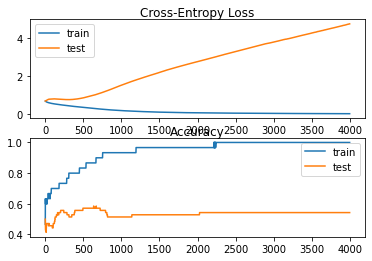

In [7]:
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

pyplot.show()

We can tie all of these pieces together; the complete example is listed below.

In [8]:
# overfit mlp for the moons dataset
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.2, random_state=1)

# split into train and test sets
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, epochs=4000, validation_data=(testX, testy), verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.586


Running the example first reports the model performance on the train and test datasets. We can see that the model has better performance on the training dataset than the test dataset, one possible sign of overfitting.

**Note:** Your specific results may vary, given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

A figure is created showing line plots of the model loss and accuracy on the train and test sets. We can see the expected shape of an overfit model where test accuracy increases to a point and then begins to decrease again. The effect is even more dramatic with loss, showing a large increase in test set loss as training continues.

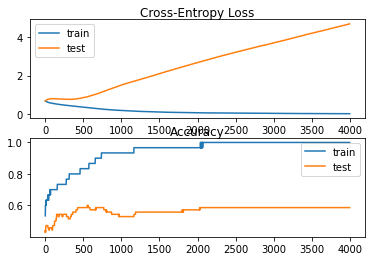

In [9]:
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

pyplot.show()

### MLP With Input Layer Noise

### MLP With Hidden Layer Noise

## Extensions

This section lists some ideas for extending the tutorial that you may wish to explore.

* **Repeated Evaluation**. Update the example to use repeated model evaluation with and without noise and report performance as the mean and standard deviation over repeats.
* **Grid Search Standard Deviation**. Develop a grid search to discover the amount of noise that reliably results in the best-performing model.
* **Input and Hidden Noise**. Update the example to introduce noise at both the input and hidden layers of the model.

## Summary

In this tutorial, you discovered that adding noise to a neural network during training can improve the robustness of the network resulting in better generalization and faster learning. Specifically, you learned:

* Small datasets can make learning challenging for neural nets, and the examples can be memorized.
* Adding noise during training can make the training process more robust and reduce generalization error.
* Noise is traditionally added to the inputs but can also be added to weights, gradients, and even activation functions.